In [44]:
!pip install pybaseball

In [45]:
import pandas as pd
import numpy as np
import pybaseball
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from pybaseball import statcast
from pybaseball import playerid_lookup, statcast_pitcher
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
player_info = playerid_lookup('Manaea', 'Sean')
player_id = player_info['key_mlbam'].values[0]
brasier_data = statcast_pitcher(start_date, end_date, player_id)
print(f"Player ID for Sean Manaea: {player_id}")

Gathering Player Data
Player ID for Sean Manaea: 640455


In [47]:
effective_speed_data

,pitch_type,stand,p_throws,balls,strikes,game_year,outs_when_up,inning,pitch_number,bat_score,effective_speed,pfx_x,pfx_z,batter,pitcher,fld_score,pitch_type_encoded
775,FF,1,0,-0.918829,1.215663,2023,-1.215362,0.934420,-0.025619,-0.812959,94.0,0.499779,1.119798,650859,640455,-0.264031,1
786,FF,1,0,-0.918829,0.026539,2023,-1.215362,0.934420,-0.581626,-0.812959,93.5,0.549367,0.922434,650859,640455,-0.264031,1
811,ST,1,0,-0.918829,-1.162585,2023,-1.215362,0.934420,-1.137633,-0.812959,77.6,-1.930027,-1.699692,650859,640455,-0.264031,4
838,FF,1,0,0.108750,1.215663,2023,1.217113,0.429986,0.530388,-0.812959,95.0,0.512176,0.245756,545341,640455,-0.264031,1
878,ST,1,0,0.108750,0.026539,2023,1.217113,0.429986,-0.025619,-0.812959,78.6,-2.872196,-0.938429,545341,640455,-0.264031,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,FF,0,0,2.163908,0.026539,2023,-1.215362,1.438855,1.086396,-0.812959,97.2,0.425397,0.978824,643217,640455,2.586272,1
4108,FF,0,0,2.163908,-1.162585,2023,-1.215362,1.438855,0.530388,-0.812959,96.9,0.512176,0.725070,643217,640455,2.586272,1
4303,FF,0,0,1.136329,-1.162585,2023,-1.215362,1.438855,-0.025619,-0.812959,98.3,0.487382,0.668680,643217,640455,2.586272,1
4454,FF,0,0,0.108750,-1.162585,2023,-1.215362,1.438855,-0.581626,-0.812959,97.3,0.487382,0.866044,643217,640455,2.586272,1


In [23]:
X = effective_speed_data.drop(columns=['pitch_type', 'pitcher'])
y = effective_speed_data['pitch_type']

X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Top features for predicting pitch type:")
print(feature_importances.head(30))

Top features for predicting pitch type:
pitch_type_encoded    0.330976
effective_speed       0.273903
pfx_x                 0.191156
pfx_z                 0.134293
inning                0.017510
batter                0.012488
bat_score             0.012209
fld_score             0.007753
stand                 0.006392
pitch_number          0.004477
balls                 0.003095
outs_when_up          0.002940
strikes               0.002808
p_throws              0.000000
game_year             0.000000
dtype: float64


In [32]:
le_stand = LabelEncoder()
le_p_throws = LabelEncoder()
le_pitch_type = LabelEncoder()
effective_speed_data['stand'] = effective_speed_data['stand'].astype(str)
effective_speed_data['p_throws'] = effective_speed_data['p_throws'].astype(str)
effective_speed_data['pitch_type'] = effective_speed_data['pitch_type'].astype(str)
effective_speed_data['stand'] = le_stand.fit_transform(effective_speed_data['stand'])
effective_speed_data['p_throws'] = le_p_throws.fit_transform(effective_speed_data['p_throws'])
effective_speed_data['pitch_type_encoded'] = le_pitch_type.fit_transform(effective_speed_data['pitch_type'])


X_pitch = effective_speed_data.drop(['pitch_type', 'pitcher', 'effective_speed'], axis=1)
y_pitch = effective_speed_data['pitch_type_encoded']
X_train_pitch, X_test_pitch, y_train_pitch, y_test_pitch = train_test_split(X_pitch, y_pitch, test_size=0.2, random_state=42)


pitch_model = RandomForestClassifier(n_estimators=100, random_state=42)
pitch_model.fit(X_train_pitch, y_train_pitch)


X_speed = effective_speed_data.drop(['effective_speed', 'pitcher', 'pitch_type'], axis=1)
y_speed = effective_speed_data['effective_speed']
X_train_speed, X_test_speed, y_train_speed, y_test_speed = train_test_split(X_speed, y_speed, test_size=0.2, random_state=42)


speed_model = RandomForestRegressor(n_estimators=100, random_state=42)
speed_model.fit(X_train_speed, y_train_speed)

def predict_pitch_type_and_speed(balls, strikes, Pitch_number, outs_when_up, inning, Bat_score, Fld_score, Previous_effective_speed, Previous_pfx_x, previous_pfx_z):
    current_game = pd.DataFrame([{
        'stand': le_stand.transform(['R'])[0] if 'R' in le_stand.classes_ else -1,
        'p_throws': le_p_throws.transform(['L'])[0] if 'L' in le_p_throws.classes_ else -1,
        'balls': balls,
        'strikes': strikes,
        'game_year': 2023,
        'outs_when_up': outs_when_up,
        'inning': inning,
        'pitch_number': Pitch_number,
        'bat_score': Bat_score,
        'fld_score': Fld_score,
        'pfx_x': Previous_pfx_x,
        'pfx_z': previous_pfx_z,
        'batter': 0 
    }])

    missing_cols = set(X_pitch.columns) - set(current_game.columns)
    for col in missing_cols:
        current_game[col] = 0 
    current_game = current_game[X_pitch.columns]

    pitch_type_probabilities = pitch_model.predict_proba(current_game)[0]
    pitch_type_probs = dict(zip(le_pitch_type.classes_, pitch_type_probabilities))

    predicted_speeds = {}
    for pitch_type in le_pitch_type.classes_:
        current_game_speed = current_game.copy()
        current_game_speed['pitch_type_encoded'] = le_pitch_type.transform([pitch_type])[0]
        effective_speed_prediction = speed_model.predict(current_game_speed)[0]
        predicted_speeds[pitch_type] = effective_speed_prediction

    return pitch_type_probs, predicted_speeds

balls = 0
strikes = 0
Pitch_number = 0
outs_when_up = 2
inning = 3
Bat_score = 3
Fld_score = 3
Previous_effective_speed = 90
Previous_pfx_x = 0.2
previous_pfx_z = 0.2

pitch_type_probs, predicted_speeds = predict_pitch_type_and_speed(balls, strikes, Pitch_number, outs_when_up, inning, Bat_score, Fld_score, Previous_effective_speed, Previous_pfx_x, previous_pfx_z)

def create_prediction_dataframe(pitch_type_probs, predicted_speeds):
    df = pd.DataFrame({
        'Pitch Type': list(pitch_type_probs.keys()),
        'Probability': list(pitch_type_probs.values()),
        'Predicted Effective Speed': list(predicted_speeds.values())
    })

    return df

prediction_df = create_prediction_dataframe(pitch_type_probs, predicted_speeds)

print("Prediction DataFrame:")
print(prediction_df)



/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_60150/455349255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effective_speed_data['stand'] = effective_speed_data['stand'].astype(str)
/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_60150/455349255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effective_speed_data['p_throws'] = effective_speed_data['p_throws'].astype(str)
/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_60150/455349255.py:6: SettingWithCopyWarning:

Prediction DataFrame:
  Pitch Type  Probability  Predicted Effective Speed
0         CH         0.76                     88.958
1         FF         0.22                     95.582
2         SI         0.00                     95.478
3         SL         0.00                     94.175
4         ST         0.02                     87.507


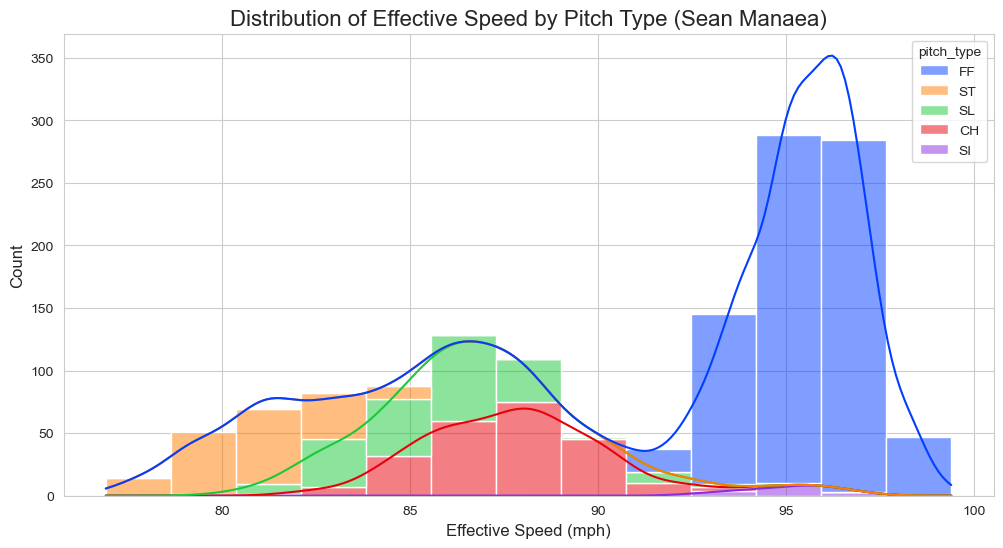

In [19]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.histplot(
    data=effective_speed_data, 
    x='effective_speed', 
    hue='pitch_type', 
    kde=True,
    palette='bright', 
    multiple='stack'
)

plt.title('Distribution of Effective Speed by Pitch Type (Sean Manaea)', fontsize=16)
plt.xlabel('Effective Speed (mph)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

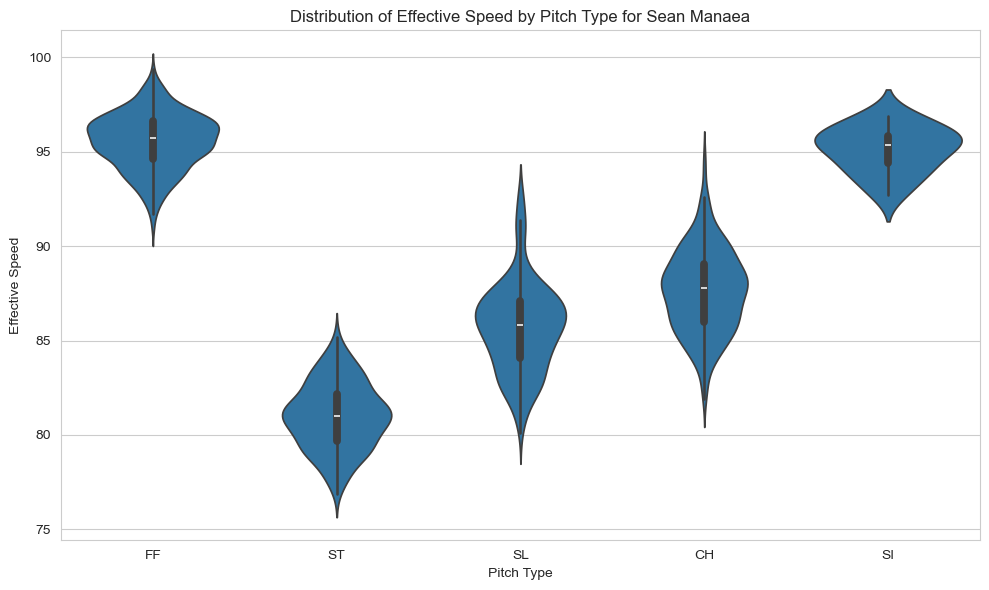

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='pitch_type', y='effective_speed', data=effective_speed_data, inner='box')
plt.title('Distribution of Effective Speed by Pitch Type for Sean Manaea')
plt.xlabel('Pitch Type')
plt.ylabel('Effective Speed')
plt.tight_layout()

plt.show()

In [28]:

y_pred_pitch = pitch_model.predict(X_test_pitch)
accuracy = accuracy_score(y_test_pitch, y_pred_pitch)
print(f"Pitch Type Prediction Accuracy: {accuracy:.2f}")


Pitch Type Prediction Accuracy: 0.99


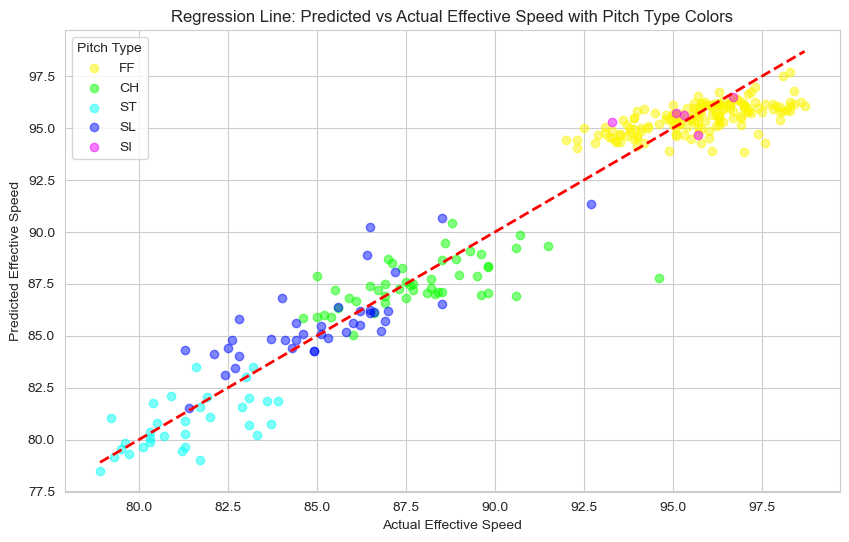

In [39]:
plt.figure(figsize=(10, 6))
unique_pitch_types = y_test_pitch.unique()
colors = sns.color_palette('hsv', len(unique_pitch_types))
for pitch_type, color in zip(unique_pitch_types, colors):
    mask = y_test_pitch == pitch_type
    plt.scatter(y_test_speed[mask], speed_model.predict(X_test_speed[mask]), alpha=0.5, label=le_pitch_type.inverse_transform([pitch_type])[0], color=color)
plt.plot([y_test_speed.min(), y_test_speed.max()], [y_test_speed.min(), y_test_speed.max()], 'r--', lw=2)
plt.xlabel('Actual Effective Speed')
plt.ylabel('Predicted Effective Speed')
plt.title('Regression Line: Predicted vs Actual Effective Speed with Pitch Type Colors')
plt.legend(title='Pitch Type')
plt.show()




In [37]:
r_squared = r2_score(y_test_speed, speed_model.predict(X_test_speed))
print(f'R-squared value: {r_squared}')

R-squared value: 0.9442606769338391


In [40]:
different_speed_model_1 = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
different_speed_model_1.fit(X_train_speed, y_train_speed)

r_squared_1 = r2_score(y_test_speed, different_speed_model_1.predict(X_test_speed))
print(f'R-squared value for model with n_estimators=200, max_depth=10: {r_squared_1}')


different_speed_model_2 = RandomForestRegressor(n_estimators=50, max_features='sqrt', random_state=42)
different_speed_model_2.fit(X_train_speed, y_train_speed)

r_squared_2 = r2_score(y_test_speed, different_speed_model_2.predict(X_test_speed))
print(f'R-squared value for model with n_estimators=50, max_features="sqrt": {r_squared_2}')


different_speed_model_3 = RandomForestRegressor(n_estimators=150, min_samples_split=5, random_state=42)
different_speed_model_3.fit(X_train_speed, y_train_speed)

r_squared_3 = r2_score(y_test_speed, different_speed_model_3.predict(X_test_speed))
print(f'R-squared value for model with n_estimators=150, min_samples_split=5: {r_squared_3}')

R-squared value for model with n_estimators=200, max_depth=10: 0.942474565007019
R-squared value for model with n_estimators=50, max_features="sqrt": 0.9326460994621217
R-squared value for model with n_estimators=150, min_samples_split=5: 0.9448729604211576


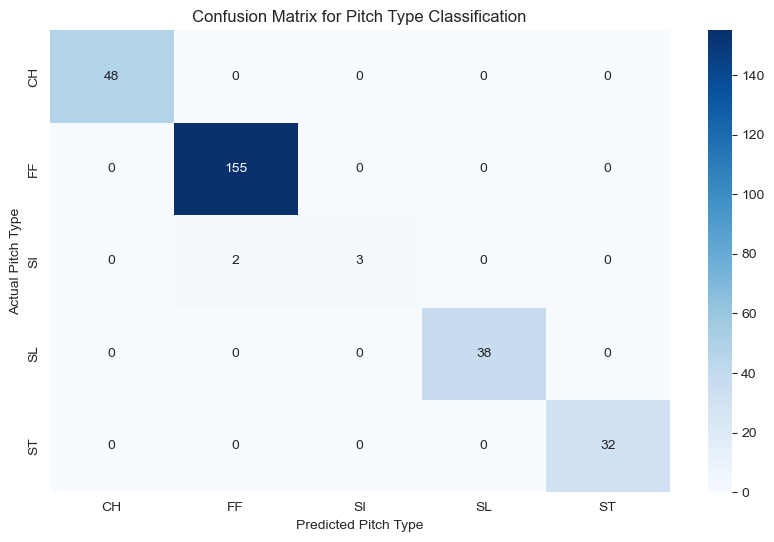

In [41]:
y_pred_pitch = pitch_model.predict(X_test_pitch)
cm = confusion_matrix(y_test_pitch, y_pred_pitch)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_pitch_type.classes_, yticklabels=le_pitch_type.classes_)
plt.xlabel('Predicted Pitch Type')
plt.ylabel('Actual Pitch Type')
plt.title('Confusion Matrix for Pitch Type Classification')
plt.show()
